# PDA Data Science Project

## Predicting Employee Turnover with Machine Learning and Generating Visualizations

## 1. Introduction

* Group Project Number: Group1
* Team Members: Jaime Alexis GarciaGarcia, Jamie Renwick, Safoora Kappukkuth Pottammal

Workplaces are always changing, and one big challenge for companies is figuring out who might leave their job soon. That's where our project comes in. We're using the power of computers and machine learning to predict if employees will leave within the next two years. We're working with data from 2012 to 2018, studying details from 4653 employees, like their education, when they joined, where they work, Payment Tier, their age, gender, work history, and most importantly, whether they stayed or left. 

Looking at data from different years gives us a special chance to see how things have changed over time. Knowing when people might leave is crucial for companies trying to manage their teams well. 

In our project, we're going deep into the data, using smart computer programs to find out which factors are linked to employees leaving. Our goal is to give companies a heads-up about potential turnover so they can take action to keep their team strong and successful. 

We will explore the details of predicting employee turnover, digging into the past to find insights that go beyond the years 2012 to 2018. 


## 2. Data collection

## 3. Data Description

### Libraries

In [2]:
# installing libraries
# pip install matplotlib

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset file

In [13]:
df = pd.read_csv('turnover.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,age,turnover,travels,department,distance_home,education,career,employees,environment_satisfaction,sex,...,satisfaction_colleagues,fortnight_hours,shares_level,experience_years,num_formations_last_year,reconciliation,years_company,years_in_position,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Medium,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,1,High,2.0,...,Very_High,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,1,Very_High,2.0,...,Medium,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Very_High,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,Very_High,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,1,Very_High,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Medium,4.0,...,Medium,80,1,6,0,NaN,6,NaN,0,3


## 4. Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        1470 non-null   int64  
 1   turnover                    1470 non-null   object 
 2   travels                     1470 non-null   object 
 3   department                  1470 non-null   object 
 4   distance_home               1470 non-null   int64  
 5   education                   1470 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   environment_satisfaction    1470 non-null   object 
 9   sex                         1271 non-null   float64
 10  implication                 1470 non-null   object 
 11  work_level                  1470 non-null   int64  
 12  position                    1470 non-null   object 
 13  job_satisfaction            1470 

### Null Values Analysis

In [14]:
df.isna().sum().sort_values(ascending = False)

years_in_position             1238
reconciliation                1011
sex                            199
education                      101
job_satisfaction                76
implication                     18
age                              0
shares_level                     0
evaluation                       0
satisfaction_colleagues          0
fortnight_hours                  0
experience_years                 0
overtime                         0
num_formations_last_year         0
years_company                    0
years_since_last_promotion       0
salary_increase_perc             0
month_salary                     0
legal_age                        0
num_previous_companies           0
turnover                         0
marital_status                   0
position                         0
work_level                       0
environment_satisfaction         0
employees                        0
career                           0
distance_home                    0
department          

### EDA Categoric Variables

In [15]:
def categoric_eda_graphs(cat):

    # rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Graph design
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # flat graph
    ax = ax.flat

    # adding graphs for each variable
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

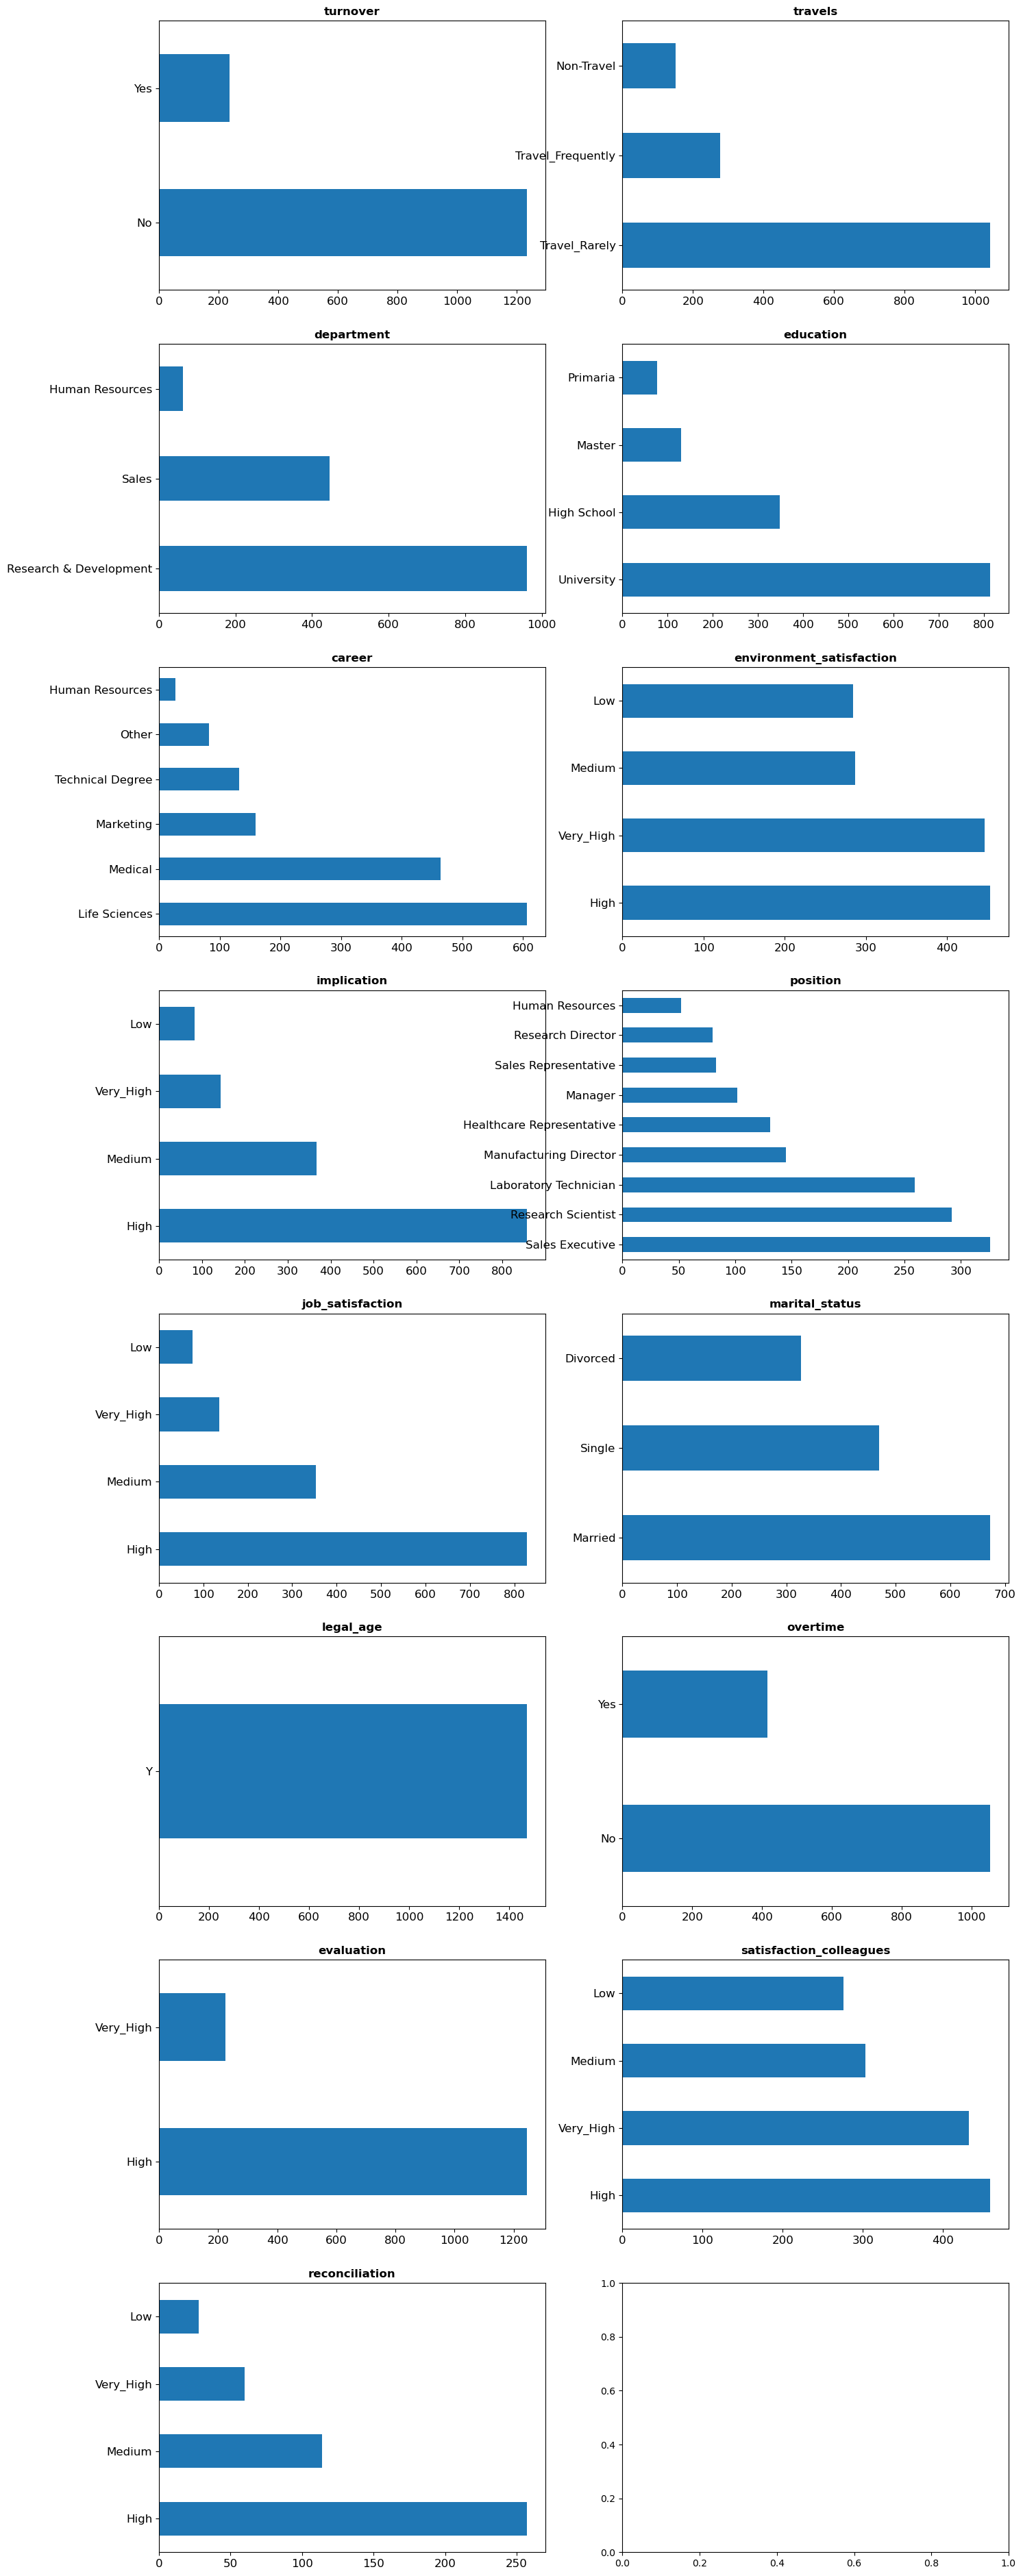

In [16]:
categoric_eda_graphs(df.select_dtypes('O'))

In [17]:
def estadistics_cont(num):
    # describe
    estadistics = num.describe().T
    # Adding median
    estadistics['median'] = num.median()
    # We rearrange the columns so that the median is next to the mean
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    # return
    return(estadistics)

In [18]:
estadistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distance_home,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employees,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sex,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
work_level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
month_salary,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_previous_companies,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increase_perc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
fortnight_hours,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
shares_level,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


### Turnover rate

In [24]:
df['LeaveOrNot'] = df['turnover'].map({'No':0, 'Yes':1})
turnover_rate = df['LeaveOrNot_Label'].value_counts(normalize=True) * 100

turnover_rate

0    83.877551
1    16.122449
Name: LeaveOrNot_Label, dtype: float64

### Is there a typical profile of an employee who leaves the company?

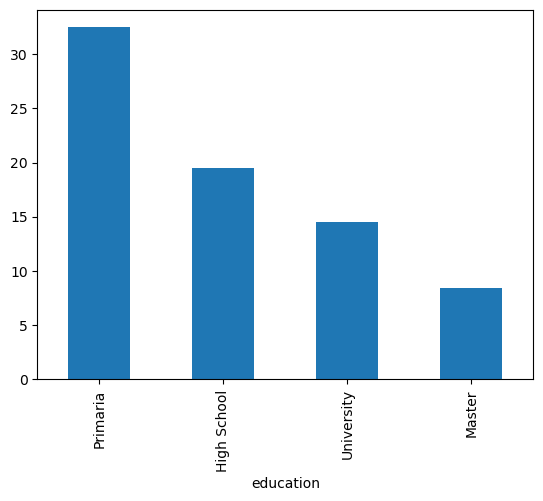

In [25]:
# Analysis by Education
temp = df.groupby('education').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

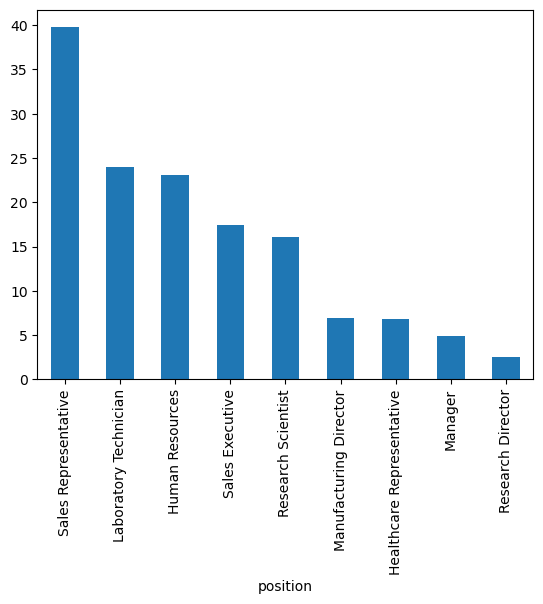

In [28]:
# Analysis by Position
temp = df.groupby('position').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

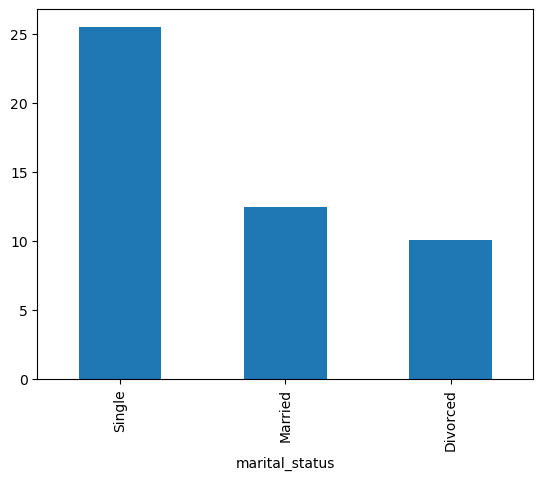

In [31]:
# Analysis by Marital Status
temp = df.groupby('marital_status').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

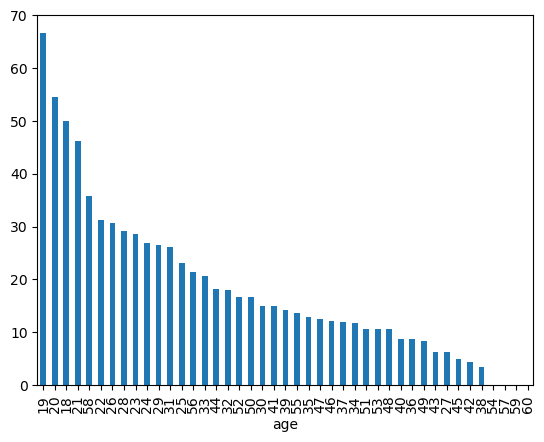

In [26]:
# Analysis by Age
temp = df.groupby('age').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

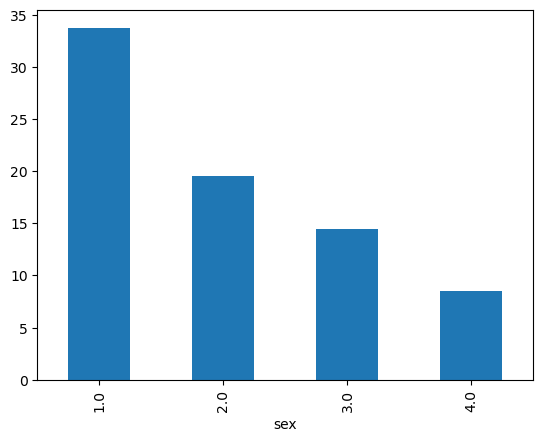

In [27]:
# Analysis by Gender
temp = df.groupby('sex').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

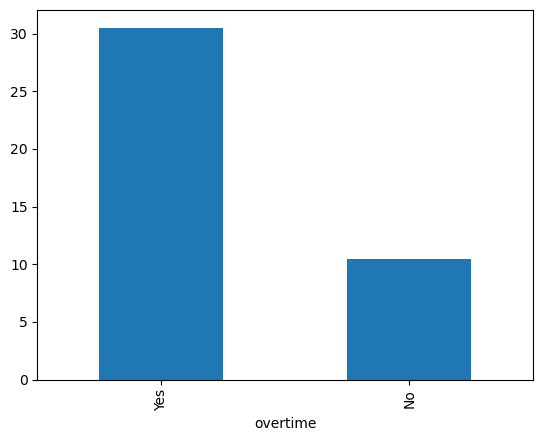

In [29]:
# Analysis by Overtime
temp = df.groupby('overtime').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

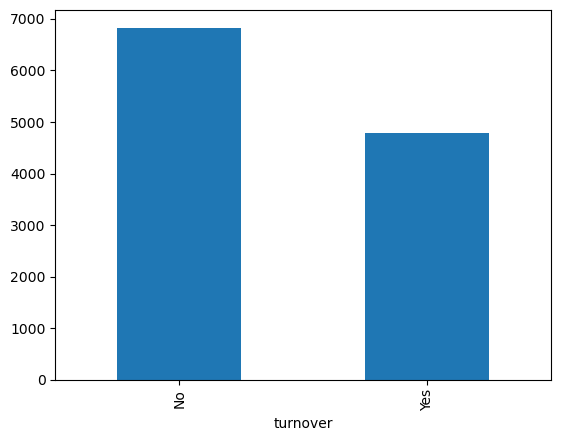

In [32]:
# Analysis by Monthly Salary
temp = df.groupby('turnover').month_salary.mean()
temp.plot.bar();

## 6. Model Selection